In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [20]:
#시계열 데이터 생성
np.random.seed(42)
n=100 #데이터 포인트 수
data = np.random.normal(0,1,n) #랜덤 시계열 데이터 생성
dates = pd.date_range(start='2022-01-01', periods=n, freq='M')

In [21]:
#데이터 프레임 생성
df= pd.DataFrame({
    'Value' : data
}, index=dates)

print(df)

               Value
2022-01-31  0.496714
2022-02-28 -0.138264
2022-03-31  0.647689
2022-04-30  1.523030
2022-05-31 -0.234153
...              ...
2029-12-31 -1.463515
2030-01-31  0.296120
2030-02-28  0.261055
2030-03-31  0.005113
2030-04-30 -0.234587

[100 rows x 1 columns]


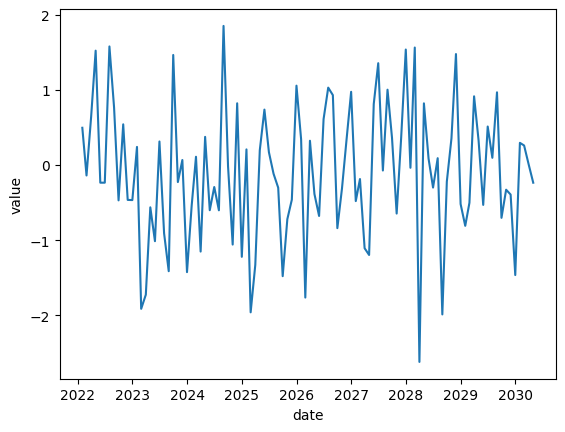

In [23]:
#데이터 시각화 
plt.plot(df)
plt.xlabel('date')
plt.ylabel('value')
plt.show()

AttributeError: 'function' object has no attribute 'predict'

In [25]:
# Seasonal ARIMA 모델 적합 및 예측
model = SARIMAX(df, order = (1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()

print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Value   No. Observations:                  100
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -131.366
Date:                            Thu, 01 Jun 2023   AIC                            272.732
Time:                                    11:05:31   BIC                            285.062
Sample:                                01-31-2022   HQIC                           277.697
                                     - 04-30-2030                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0608      0.151     -0.403      0.687      -0.357       0.235
ma.L1         -0.9300      0.085   

In [26]:
pred = results.predict(start='2022-01-31', end='2030-04-30')

<function matplotlib.pyplot.show(close=None, block=None)>

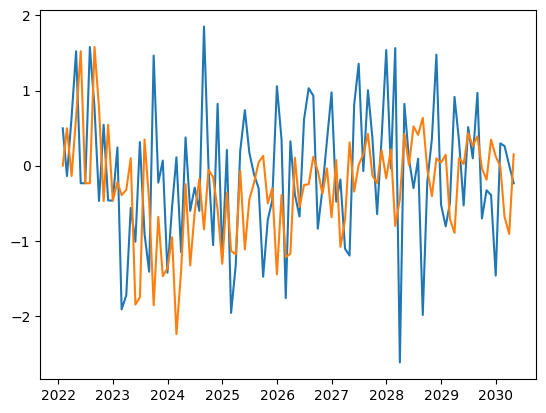

In [29]:
plt.plot(df, label='Actual')
plt.plot(pred, label='SARIMA')
plt.legend
plt.show